In [1]:
!pip install datasets sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 113.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=6a42b0185c6f28140568d124bd2b85861f722ee

In [2]:
from PIL import Image
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util

In [3]:
fashion = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

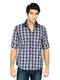

In [4]:
fashion[0]['image']

In [5]:
fashion.features

{'id': Value(dtype='int64', id=None),
 'gender': Value(dtype='string', id=None),
 'masterCategory': Value(dtype='string', id=None),
 'subCategory': Value(dtype='string', id=None),
 'articleType': Value(dtype='string', id=None),
 'baseColour': Value(dtype='string', id=None),
 'season': Value(dtype='string', id=None),
 'year': Value(dtype='float64', id=None),
 'usage': Value(dtype='string', id=None),
 'productDisplayName': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None)}

In [6]:
images = fashion["image"]
fashion=fashion.remove_columns("image")

fashion_frame=fashion.to_pandas()

In [7]:
model = SentenceTransformer('clip-ViT-B-32')

In [8]:
product_number=0

text_embedding = model.encode([fashion_frame['productDisplayName'][product_number]])
image_embedding=model.encode(images[product_number])

query="blue jeans"
query_embedding = model.encode(query)

In [9]:
cosine = util.cos_sim(image_embedding, query_embedding)

In [10]:
cosine

tensor([[0.2068]])

In [11]:
image_embeddings = model.encode([image for image in images])

In [12]:
results = util.semantic_search(query_embedding, image_embeddings, top_k=10)[0]

In [13]:
results

[{'corpus_id': 36711, 'score': 0.2869890034198761},
 {'corpus_id': 26372, 'score': 0.28497713804244995},
 {'corpus_id': 10125, 'score': 0.28484585881233215},
 {'corpus_id': 11907, 'score': 0.28346070647239685},
 {'corpus_id': 1, 'score': 0.2814236283302307},
 {'corpus_id': 42971, 'score': 0.28113457560539246},
 {'corpus_id': 27889, 'score': 0.28097790479660034},
 {'corpus_id': 13421, 'score': 0.28049910068511963},
 {'corpus_id': 43235, 'score': 0.28045547008514404},
 {'corpus_id': 17844, 'score': 0.27989107370376587}]

In [14]:
def img_search(query, k=10):
    query_embedding = model.encode([query])
    results = util.semantic_search(query_embedding, image_embeddings, top_k=k)[0]
    for r in results:
        display(images[r['corpus_id']])

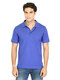

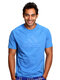

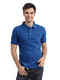

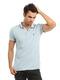

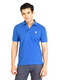

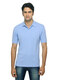

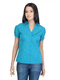

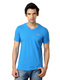

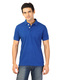

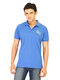

In [15]:
img_search('blue shirt')